In [1]:
#Timeseries clustering 
import rpy2.robjects as robjects
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mikeio import Dfs0, Dataset
from tslearn.utils import to_time_series
from tslearn.utils import to_time_series_dataset
from tslearn.preprocessing import TimeSeriesScalerMinMax, TimeSeriesScalerMeanVariance, TimeSeriesResampler
from tslearn.clustering import TimeSeriesKMeans, silhouette_score

In [ ]:
#Run IETD R script to extract rainfall event or "complete storms"
r = robjects.r('source("C:/Projects/Side_Projects/Monte_Carlo/Script/IETD.r")')

In [2]:
#Import timeseries data 
df = np.genfromtxt(r"C:/Projects/Side_Projects/Monte_Carlo/Script/Output/Filtered_Rainfall_Events_ts_input.csv", delimiter=',')

#Delete first index in array
df = np.delete(df, 0, axis=0)

#Remove all NaN values to create nd.array with varying length
row = df.shape[1]
df = [[i for i in row if ~np.isnan(i)] for row in df]

#Find max storm duration
max_sd = len(max(df, key=len))
min_sd = len(min(df, key=len))
max_sd

70

In [3]:
#Filter array based on length (storm duration)
SD_3_hr = np.array([row for row in df if len(row) <= 3])
SD_6_hr = np.array([row for row in df if 3 <= len(row) <= 6])
SD_12_hr = np.array([row for row in df if 6 <= len(row) <= 12])
SD_24_hr = np.array([row for row in df if 12 <= len(row) <= 24])
SD_48_hr = np.array([row for row in df if 24 <= len(row) <= 48])
SD_72_hr = np.array([row for row in df if 48 <= len(row) <= 72])

#Select Storm Duration
SD = 48

if SD == 3:
    ts = SD_3_hr
elif SD == 6:
    ts = SD_6_hr
elif SD == 12:
    ts = SD_12_hr
elif SD == 24:
    ts = SD_24_hr
elif SD == 48:
    ts = SD_48_hr
elif SD == 72:
    ts = SD_72_hr

C:\Users\rwjc\AppData\Local\Temp/ipykernel_11368/3931009979.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  SD_3_hr = np.array([row for row in df if len(row) <= 3])
C:\Users\rwjc\AppData\Local\Temp/ipykernel_11368/3931009979.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  SD_6_hr = np.array([row for row in df if 3 <= len(row) <= 6])
C:\Users\rwjc\AppData\Local\Temp/ipykernel_11368/3931009979.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different

In [4]:
#Append Nan values for rows shorter than the max array row length
row_lengths = []

for row in ts:
    row_lengths.append(len(row))

max_length = max(row_lengths)

for row in ts:
    while len(row) < max_length:
        row.append(np.NaN)

#Format input numpy array into 
X_train = to_time_series_dataset(ts)

#Shuffle array to randomize timeseries order
np.random.shuffle(X_train)

#Scale timeseries
X_train = TimeSeriesScalerMinMax().fit_transform(X_train)

#Generate seed
seed = 0
np.random.seed(seed)

DBA k-means
Init 1


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 160 out of 160 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 480 out of 480 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 480 out of 480 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      |

0.444 --> 

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 480 out of 480 | elapsed:    0.1s finished


0.294 --> 

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 480 out of 480 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s


0.294 --> 
Init 2


[Parallel(n_jobs=4)]: Done 160 out of 160 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 480 out of 480 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 480 out of 480 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[

0.428 --> 

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 480 out of 480 | elapsed:    0.1s finished


0.278 --> 

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 480 out of 480 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s


0.267 --> 

[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 480 out of 480 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s


0.267 --> 


[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 480 out of 480 | elapsed:    0.1s finished


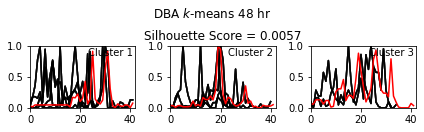

In [6]:
# DBA-k-means
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=3,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=50,
                          random_state=seed,
                          n_jobs=4)                     #Change according the CPU threads
y_pred = dba_km.fit_predict(X_train)

#Calculate Silhouette Score
labels = np.random.randint(2, size=len(X_train))
silhouette_score = silhouette_score(X_train, labels, metric="dtw")

#Plot timeseries clustering results
for yi in range(3):
    plt.subplot(3, 3, 4 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, X_train.shape[1])
    plt.ylim(0, 1)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.suptitle("DBA $k$-means" + " " + str(SD) + " hr", y=0.7)
        plt.title("Silhouette Score = " + str(float("{:.4f}".format(silhouette_score))))
plt.tight_layout()
plt.savefig(r"C:/Projects/Side_Projects/Monte_Carlo/Script/Output/DBA_K-Means_" + str(SD) + "hr"+ ".png")
plt.show()

#Export results (unit hyetographs)
output_ts = dba_km.cluster_centers_.reshape(dba_km.cluster_centers_.shape[0], -1)
output_ts = output_ts.T
output_ts = pd.DataFrame(output_ts, columns=["Cluster_1", "Cluster_2", "Cluster_3"])
output_ts.to_csv(r"C:/Projects/Side_Projects/Monte_Carlo/Script/Output/DBA_K-Means_" + str(SD) + "hr_cluster_centers.csv")